In [1]:
import random

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

In [2]:
data, targets = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

/Users/dillhoff/opt/anaconda3/envs/cse6363/lib/python3.10/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
data_train = data[:60000]
targets_train = targets[:60000]
data_test = data[60000:]
targets_test = targets[60000:]

# Split data_train into a training and validation set
data_train, data_val, targets_train, targets_val = train_test_split(data_train, targets_train, test_size=0.2, random_state=0, stratify=targets_train)

nbc = BernoulliNB().fit(data_train, targets_train)

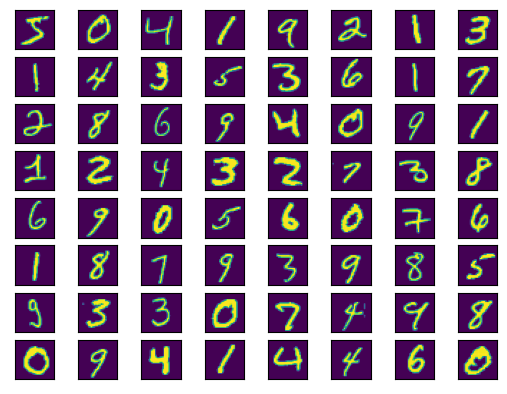

In [4]:
# View Samples
num_rows = 8
num_cols = 8
fig = plt.figure()
for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        ax = fig.add_subplot(num_rows, num_cols, idx + 1)
        ax.imshow(data_train[idx].reshape((28, 28)))
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

In [5]:
train_acc = nbc.score(data_train, targets_train)
test_acc = nbc.score(data_test, targets_test)
print(f"Training Accuracy = {train_acc}\nTest Accuracy = {test_acc}")

Training Accuracy = 0.83125
Test Accuracy = 0.8413


(10, 784)


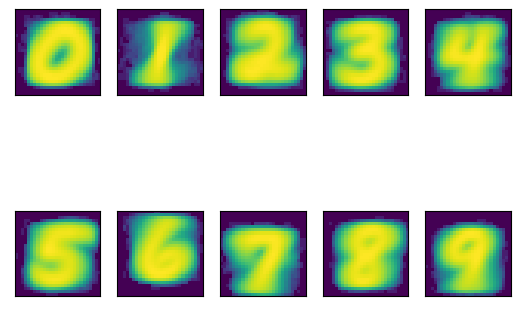

In [6]:
params = nbc.feature_log_prob_
print(params.shape)

fig = plt.figure()
for i in range(2):
    for j in range(5):
        idx = i * 5 + j
        ax = fig.add_subplot(2, 5, idx + 1)
        ax.imshow(params[idx].reshape((28, 28)))
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

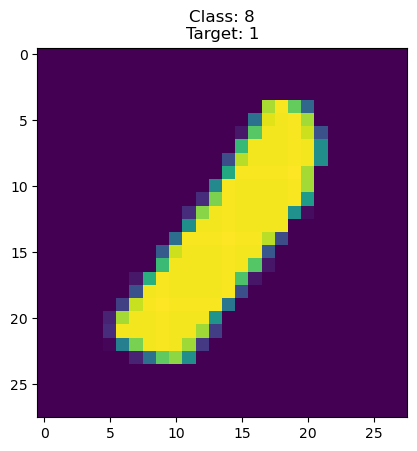

In [16]:
idx = random.randint(0, len(targets_test) - 1)
prediction = nbc.predict(data_test)
label = targets_test[idx]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data_test[idx].reshape((28, 28)))
ax.set_title(f"Class: {prediction[idx]}\nTarget: {label}");